<a href="https://colab.research.google.com/github/AycaCicek/MedicalCostAnalyze-ML-Regression/blob/main/RegresyonModelleriyleTahminleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [5]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data_encoding=pd.get_dummies(data[["smoker","region","sex"]])
data_encoding.head(3) #--> smoker_yes alındı,sex_female alalım.

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0,1
2,1,0,0,0,1,0,0,1


In [12]:
y=data["charges"]
X_=data.drop(["charges","smoker"],axis=1)
X_.head()

X=pd.concat([X_[["age","bmi","children"]],data_encoding[["smoker_yes","region_northeast","region_northwest","region_southeast",
                               "region_southwest","sex_female"]]],axis=1)

X.head()#-->bağımsız değişkenler

,age,bmi,children,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female
0,19,27.900,0,1,0,0,0,1,1
1,18,33.770,1,0,0,0,1,0,0
2,28,33.000,3,0,0,0,1,0,0
3,33,22.705,0,0,0,1,0,0,0
4,32,28.880,0,0,0,1,0,0,0


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
len(X_train)

1003

In [15]:
len(y_train)

1003

MODEL VE TAHMİN


* LightGBM Regressor
* XGBRegressor
* GradientBoostingRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* MLPRegressor
* KNeighborsRegressor
* SVR

In [20]:
def compML(df,y,alg):
  #train-test ayrimi
  y=df[y]
  #bağımsız değişken :
  X_=data.drop(["charges","smoker"],axis=1)
  X=pd.concat([X_[["age","bmi","children"]],data_encoding[["smoker_yes","region_northeast","region_northwest","region_southeast",
                               "region_southwest","sex_female"]]],axis=1)
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
  ##modelleme
  model=alg().fit(X_train,y_train)
  y_pred=model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
  model_ismi=alg.__name__
  print(f"""
  **********************
  model: {model_ismi}
  RMSE : {RMSE}
  ************************
  """)
  return RMSE

In [25]:
models=[LGBMRegressor,XGBRegressor,
        GradientBoostingRegressor,RandomForestRegressor,
        DecisionTreeRegressor,MLPRegressor,
        KNeighborsRegressor,SVR]

In [26]:
for model in models:
  compML(data,"charges",model)


  **********************
  model: LGBMRegressor
  RMSE : 4748.806640102819
  ************************
  
[20:53:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

  **********************
  model: XGBRegressor
  RMSE : 4568.7877951435985
  ************************
  

  **********************
  model: GradientBoostingRegressor
  RMSE : 4575.793643872116
  ************************
  

  **********************
  model: RandomForestRegressor
  RMSE : 4752.128688050651
  ************************
  

  **********************
  model: DecisionTreeRegressor
  RMSE : 6390.085949573726
  ************************
  

  **********************
  model: MLPRegressor
  RMSE : 12094.359302969042
  ************************
  

  **********************
  model: KNeighborsRegressor
  RMSE : 10924.818629272828
  ************************
  

  **********************
  model: SVR
  RMSE : 12859.882128357047
  ************************
  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


- En düşük hatalı model :XGBRegressor
** RMSE-->4568,78

CATBOOST

In [28]:
len(X_train)

1003

In [27]:
catmodel=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.040962
0:	learn: 11667.4667674	total: 824us	remaining: 824ms
1:	learn: 11352.4306437	total: 2.78ms	remaining: 1.39s
2:	learn: 11006.5487296	total: 5.39ms	remaining: 1.79s
3:	learn: 10684.1852306	total: 8.13ms	remaining: 2.02s
4:	learn: 10371.5439004	total: 10.5ms	remaining: 2.1s
5:	learn: 10101.7903931	total: 13.7ms	remaining: 2.27s
6:	learn: 9820.9607385	total: 15.4ms	remaining: 2.19s
7:	learn: 9538.5711409	total: 17.7ms	remaining: 2.19s
8:	learn: 9287.8559520	total: 28.1ms	remaining: 3.1s
9:	learn: 9027.2064402	total: 29.9ms	remaining: 2.96s
10:	learn: 8782.9544550	total: 31.7ms	remaining: 2.85s
11:	learn: 8553.9615257	total: 33.4ms	remaining: 2.75s
12:	learn: 8357.5786909	total: 49.7ms	remaining: 3.78s
13:	learn: 8153.7619610	total: 51.6ms	remaining: 3.64s
14:	learn: 7956.4166302	total: 54ms	remaining: 3.54s
15:	learn: 7790.6770581	total: 55.9ms	remaining: 3.44s
16:	learn: 7611.3985687	total: 57.4ms	remaining: 3.32s
17:	learn: 7455.8722944	total: 59.4ms	remain

In [30]:
y_pred=catmodel.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4597.85477699046

XGBREGRESSOR TUNING

In [31]:
xgbmodel=XGBRegressor().fit(X_train,y_train)

[21:11:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
xgbmodel.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [33]:
xgb_params = {'learning_rate': [0.1,0.01,0.5],
              'max_depth': [2,3,4,5,8],
               'n_estimators': [100,200,500,1000],
              'colsample_bytree': [0.4,0.7,1]}#--> alt küme oranı

In [34]:
xgb_cv_model=GridSearchCV(xgbmodel,xgb_params,cv=10,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[21:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[21:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[21:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[21:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[21:19:05] WARNING: /worksp

In [35]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200}

In [36]:
xgb_model_tuning=XGBRegressor(colsample_bytree=0.7,learning_rate= 0.1,max_depth= 2,n_estimators=200).fit(X_train,y_train)

[21:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
y_pred=xgb_model_tuning.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4550.331480911572

MODEL PERFORMANS GÖRSELLEŞTİRME

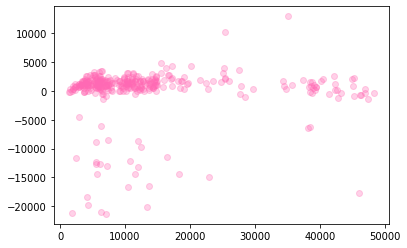

In [49]:
plt.scatter(y_pred, y_pred - y_test,
          c = 'hotpink', marker = 'o',alpha = 0.3,
          label = 'Test data')
plt.show()